In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("../data/boston_house_prices.csv")
howmany = df.shape[1] + 1

pca = PCA(n_components=14, svd_solver="full")
pca_fit = pca.fit_transform(df)
pca_evr = pca.explained_variance_ratio_
print("pca_evr")
print(pca_evr)
print("\n")

num_sv = np.arange(1, pca_evr.size+1)
cum_var_explained = [np.sum(pca_evr[0:n]) / np.sum(pca_evr) for n in num_sv]
print("cum_var_explained")
print(cum_var_explained)
print("\n")


pca_evr
[8.04572190e-01 1.62705572e-01 2.14083271e-02 6.95759438e-03
 2.00539401e-03 1.21514667e-03 4.44138834e-04 3.52919538e-04
 2.31912833e-04 7.08317644e-05 2.86851375e-05 5.67272608e-06
 1.53848513e-06 7.61439984e-08]


cum_var_explained
[0.8045721903184201, 0.9672777623879754, 0.9886860894826364, 0.9956436838636572, 0.997649077870802, 0.9988642245374929, 0.9993083633712068, 0.9996612829095638, 0.9998931957428973, 0.9999640275072564, 0.9999927126447973, 0.9999983853708758, 0.9999999238560017, 1.0]




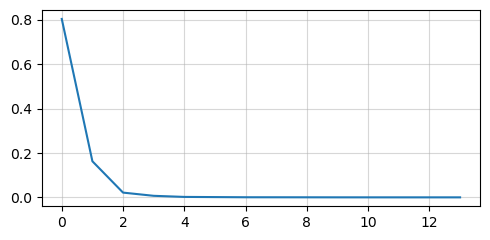

In [18]:
fig = plt.figure(figsize=(5.0,2.5))
ax = fig.add_subplot(111)

plt.plot(pca_evr)
plt.grid(alpha=0.5, zorder=1)
plt.tight_layout()

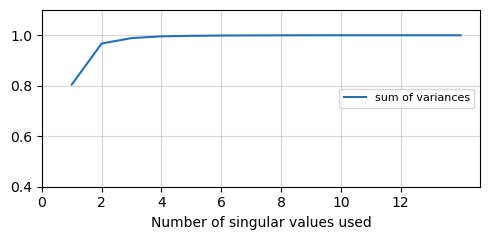

In [16]:

fig = plt.figure(figsize=(5.0,2.5))
ax = fig.add_subplot(111)

plt.plot(num_sv,
         cum_var_explained,
         color='#2171b5',
         label='sum of variances')


plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(np.arange(0, pca_evr.size-1, 2))

ax.set_ylim(0.4, 1.1)
ax.set_xlabel('Number of singular values used')
# ax.set_ylabel('Sum of variances in data')

plt.grid(alpha=0.5, zorder=1)
plt.tight_layout()